<a href="https://colab.research.google.com/github/LeidianeAnjos/Rede_Neural/blob/main/T_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
T = np.array([
    [1, 1, 1],
    [0, 1, 0],
    [0, 1, 0]
])

H = np.array([
    [1, 0, 1],
    [1, 1, 1],
    [1, 0, 1]
])

In [25]:
# Flatten: transforma 3x3 em vetor 1x9
x_T = T.flatten()
x_H = H.flatten()

In [26]:
# Entradas e saídas / A saída esperada é: 1 para "T", 0 para "H".
entradas = np.array([x_T, x_H])    # duas amostras: T e H
saidas = np.array([[1], [0]])      # T → 1, H → 0

In [27]:
#Funções sigmoide e derivada
#sigmoid(x) transforma qualquer número real em algo entre 0 e 1.

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivada usada para ajustar os pesos no treinamento (relação com o
# gradiente).
def sigmoid_derivada(x):
    sx = sigmoid(x)
    return sx * (1 - sx)


In [28]:
# Inicialização dos pesos e bias
np.random.seed(42) #Isso trava a "aleatoriedade".
pesos = np.random.randn(9, 1)       # 9 entradas (3x3), 1 saída
bias = np.random.randn(1, 1)        #  número extra que o neurônio adiciona à conta final antes de passar pela função sigmoide.


In [29]:
# Hiperparâmetros
taxa_aprendizado = 0.5
epocas = 1000
erros = []

Aprendizado supervisionado /

In [30]:
# Treinamento com Regra Delta ---
for epoca in range(epocas):
    erro_total = 0
    for i in range(len(entradas)):
        x = entradas[i].reshape(1, 9)      # transforma entrada em vetor linha
        y = saidas[i]

        # Feedforward
        z = np.dot(x, pesos) + bias
        y_pred = sigmoid(z)

        # Cálculo do erro
        erro = y - y_pred
        erro_total += (erro ** 2).mean()

        # Gradiente (regra delta)
        grad = erro * sigmoid_derivada(z)
        pesos += taxa_aprendizado * x.T @ grad
        bias += taxa_aprendizado * grad   # corrigido para shapes compatíveis

    erros.append(erro_total)

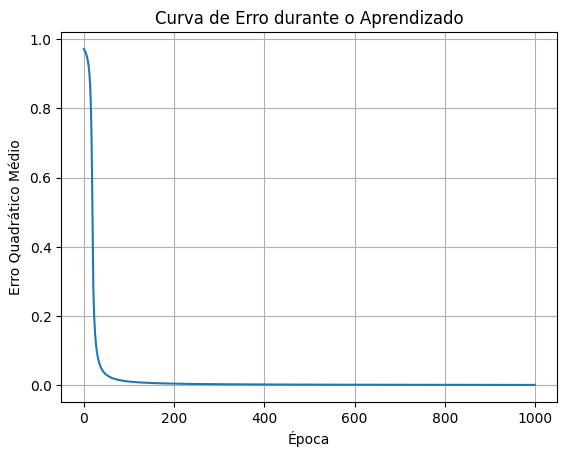

In [31]:
#Curva de erro
plt.plot(erros)
plt.title("Curva de Erro durante o Aprendizado")
plt.xlabel("Época")
plt.ylabel("Erro Quadrático Médio")
plt.grid(True)
plt.show()


In [32]:
# Função para prever ---
def prever(caractere):
    x = caractere.flatten().reshape(1, 9)
    z = np.dot(x, pesos) + bias
    y_pred = sigmoid(z)
    return y_pred[0][0]

# Testes com T e H originais
saida_T = prever(T)
saida_H = prever(H)

# --- 7. Testes com distorções ---
T_distorcido = T.copy()
T_distorcido[2, 1] = 0  # remove um pixel central inferior

H_distorcido = H.copy()
H_distorcido[0, 0] = 0  # remove um pixel no canto superior esquerdo

saida_T_distorcido = prever(T_distorcido)
saida_H_distorcido = prever(H_distorcido)

(saida_T, saida_H, saida_T_distorcido, saida_H_distorcido)

(np.float64(0.9797202654149049),
 np.float64(0.018467984673325548),
 np.float64(0.8433316814417872),
 np.float64(0.014698301114578462))

In [33]:
# Interpretação dos resultados

def interpretar_saida(valor, limiar=0.5):
    """Interpreta a saída do neurônio"""
    if valor >= limiar:
        return "Reconhecido como T"
    else:
        return "Reconhecido como H"

# Teste com T original
print("Teste com T original:")
print(f"Saída: {saida_T:.4f} → {interpretar_saida(saida_T)}\n")

# Teste com H original
print("Teste com H original:")
print(f"Saída: {saida_H:.4f} → {interpretar_saida(saida_H)}\n")

# Teste com T -> distorcido
print("Teste com T distorcido:")
print(f"Saída: {saida_T_distorcido:.4f} → {interpretar_saida(saida_T_distorcido)}\n")

# Teste com H -> distorcido
print("Teste com H distorcido:")
print(f"Saída: {saida_H_distorcido:.4f} → {interpretar_saida(saida_H_distorcido)}\n")


Teste com T original:
Saída: 0.9797 → Reconhecido como T

Teste com H original:
Saída: 0.0185 → Reconhecido como H

Teste com T distorcido:
Saída: 0.8433 → Reconhecido como T

Teste com H distorcido:
Saída: 0.0147 → Reconhecido como H

